### Business Understanding:

In the fast-paced world of finance, timely access to real-time stock market data is essential for making well-informed decisions, crafting effective strategies, and managing risks. This data wealth offers a unique opportunity to develop predictive models capable of forecasting stock prices, spotting emerging trends, and providing actionable insights to empower investors and traders.

Our proposal introduces a comprehensive data science project designed to harness real-time stock market data for constructing predictive models. By leveraging sophisticated machine learning techniques and advanced data analysis methodologies, our project aims to bridge the gap between raw data and strategic decision-making. We believe that by providing stakeholders in the financial sector with robust predictive tools, we can help them navigate the intricate landscape of the stock market more effectively.

This proposal outlines a structured approach to utilizing real-time stock market data, including data collection, preprocessing, feature engineering, model development, and rigorous evaluation. Through the collaborative efforts of multidisciplinary teams, combined with our commitment to innovation and excellence, we aspire to redefine the boundaries of predictive analytics in finance. Our goal is to create value, manage risks, and foster sustainable growth within the financial ecosystem.



## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

## Load Data

In [2]:
stocks_df = pd.read_excel("Data/update_stock_data.xlsx", index_col = 0)
stocks_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,Name
2022-01-03,182.01,182.88,177.71,177.83,2022-01-03,AAPL,104701220.0,HISTORICAL_PRICES,AAPL,NaN,...,104701220,175.358163,179.480061,180.337968,175.239831,104701220.0,2022-01-03,4.44,0.0250,Apple Inc.
2022-01-04,179.70,182.94,179.12,182.63,2022-01-04,AAPL,99310438.0,HISTORICAL_PRICES,AAPL,NaN,...,99310438,180.091443,177.202170,180.397134,176.630232,99310438.0,2022-01-04,-2.31,-0.0127,Apple Inc.
2022-01-05,174.92,180.17,174.64,179.61,2022-01-05,AAPL,94537602.0,HISTORICAL_PRICES,AAPL,NaN,...,94537602,177.113421,172.488612,177.665637,172.212504,94537602.0,2022-01-05,-4.78,-0.0266,Apple Inc.
2022-01-06,172.00,175.30,171.64,172.70,2022-01-06,AAPL,96903955.0,HISTORICAL_PRICES,AAPL,NaN,...,96903955,170.299470,169.609200,172.863330,169.254204,96903955.0,2022-01-06,-2.92,-0.0167,Apple Inc.
2022-01-07,172.17,174.14,171.03,172.89,2022-01-07,AAPL,86709147.0,HISTORICAL_PRICES,AAPL,NaN,...,86709147,170.486829,169.776837,171.719454,168.652683,86709147.0,2022-01-07,0.17,0.0010,Apple Inc.


In [3]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10509 entries, 2022-01-03 to 2022-12-30
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   close                 10509 non-null  float64       
 1   high                  10509 non-null  float64       
 2   low                   10509 non-null  float64       
 3   open                  10509 non-null  float64       
 4   priceDate             10509 non-null  datetime64[ns]
 5   symbol                10509 non-null  object        
 6   volume                10509 non-null  float64       
 7   id                    10509 non-null  object        
 8   key                   10509 non-null  object        
 9   subkey                0 non-null      float64       
 10  updated               10509 non-null  float64       
 11  changeOverTime        10509 non-null  float64       
 12  marketChangeOverTime  10509 non-null  float64       
 13 

In [4]:
stocks_df.describe()

,close,high,low,open,priceDate,volume,subkey,updated,changeOverTime,marketChangeOverTime,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
count,10509.000000,10509.000000,10509.000000,10509.000000,10509,1.050900e+04,0.0,1.050900e+04,10509.000000,10509.000000,...,10509.000000,1.050900e+04,10509.000000,10509.000000,10509.000000,10509.000000,1.050900e+04,10509,10509.000000,10509.000000
mean,223.485346,227.252650,219.847448,223.738443,2022-06-30 12:05:32.971738624,2.922589e+07,NaN,1.712387e+12,0.850805,0.850805,...,327.361217,2.455677e+07,161.398618,161.268858,163.939047,158.671194,2.922589e+07,2022-06-30 12:05:32.971738624,-0.925026,-0.001275
min,25.040000,25.480000,24.590000,24.725000,2022-01-03 00:00:00,1.197767e+06,NaN,1.659625e+12,-0.955650,-0.955650,...,24.590000,7.458600e+05,23.770615,24.073456,24.496472,23.640826,1.197767e+06,2022-01-03 00:00:00,-2322.210000,-0.949000
25%,96.310000,98.230000,95.030000,96.520000,2022-03-31 00:00:00,7.624161e+06,NaN,1.713002e+12,-0.111187,-0.111187,...,95.030000,6.448739e+06,83.120000,83.139342,84.820000,81.765450,7.624161e+06,2022-03-31 00:00:00,-2.050000,-0.015000
50%,147.630000,149.675000,145.522505,147.470000,2022-06-29 00:00:00,1.893468e+07,NaN,1.713002e+12,0.233579,0.233579,...,154.950000,1.541502e+07,140.900500,140.489334,142.607750,138.797000,1.893468e+07,2022-06-29 00:00:00,-0.130000,-0.001300
75%,231.840000,236.600000,226.420000,231.300000,2022-09-29 00:00:00,3.991910e+07,NaN,1.713002e+12,0.483837,0.483837,...,265.610000,3.272002e+07,220.945000,221.420000,225.750000,216.350000,3.991910e+07,2022-09-29 00:00:00,1.660000,0.012500
max,3408.090000,3428.000000,3357.370000,3408.760000,2022-12-30 00:00:00,2.732081e+08,NaN,1.713003e+12,21.506579,21.506579,...,3357.370000,2.231334e+08,605.610000,597.370000,609.990000,590.560000,2.732081e+08,2022-12-30 00:00:00,375.880000,0.367600
std,400.097648,407.336922,393.242690,401.052866,NaN,2.963628e+07,NaN,4.184407e+09,3.022659,3.022659,...,594.171843,2.628159e+07,105.304724,105.077810,107.072277,103.192552,2.963628e+07,NaN,35.270362,0.030460


In [5]:
stocks_df.shape

(10509, 27)

In [6]:
stocks_df.dtypes

close                          float64
high                           float64
low                            float64
open                           float64
priceDate               datetime64[ns]
symbol                          object
volume                         float64
id                              object
key                             object
subkey                         float64
updated                        float64
changeOverTime                 float64
marketChangeOverTime           float64
uOpen                          float64
uClose                         float64
uHigh                          float64
uLow                           float64
uVolume                          int64
fOpen                          float64
fClose                         float64
fHigh                          float64
fLow                           float64
fVolume                        float64
label                   datetime64[ns]
change                         float64
changePercent            

## Data Cleaning

In [7]:
stocks_df.isna().sum()

close                       0
high                        0
low                         0
open                        0
priceDate                   0
symbol                      0
volume                      0
id                          0
key                         0
subkey                  10509
updated                     0
changeOverTime              0
marketChangeOverTime        0
uOpen                       0
uClose                      0
uHigh                       0
uLow                        0
uVolume                     0
fOpen                       0
fClose                      0
fHigh                       0
fLow                        0
fVolume                     0
label                       0
change                      0
changePercent               0
Name                        0
dtype: int64

In [8]:
def missing_values(data):
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [9]:
missing_data = missing_values(stocks_df)
missing_data

,index,Missing Values,Percentage
0,subkey,10509,1.0


In [10]:
stocks_df = stocks_df.drop('subkey', axis = 1)
stocks_df.isna().sum()

close                   0
high                    0
low                     0
open                    0
priceDate               0
symbol                  0
volume                  0
id                      0
key                     0
updated                 0
changeOverTime          0
marketChangeOverTime    0
uOpen                   0
uClose                  0
uHigh                   0
uLow                    0
uVolume                 0
fOpen                   0
fClose                  0
fHigh                   0
fLow                    0
fVolume                 0
label                   0
change                  0
changePercent           0
Name                    0
dtype: int64

In [11]:
## set priceDate  as index
stocks_df.set_index('priceDate', inplace = True)

In [12]:
stocks_df.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='priceDate', length=10509, freq=None)

## Consistency

For the data to be constisten, I need to resolve any inconsistenices by checking for duplicatie values in our data

In [13]:
# checking for duplicates
print(f'The data has {stocks_df.duplicated().sum()} duplicates')

The data has 3874 duplicates


In [14]:
stocks_df.drop_duplicates(inplace=True)
print(f'The data has {stocks_df.duplicated().sum()} duplicates removed.')
 

The data has 0 duplicates removed.


In [15]:
stocks_df.shape

(6635, 25)

## Feature Engineering

In [16]:
# 1. Extract date-time features
stocks_df['day_of_week'] = stocks_df.index.dayofweek
stocks_df['month'] = stocks_df.index.month
stocks_df['quarter'] = stocks_df.index.quarter
stocks_df['year'] = stocks_df.index.year

print(stocks_df[['day_of_week', 'month', 'quarter', 'year']].head())

            day_of_week  month  quarter  year
priceDate                                    
2022-01-03            0      1        1  2022
2022-01-04            1      1        1  2022
2022-01-05            2      1        1  2022
2022-01-06            3      1        1  2022
2022-01-07            4      1        1  2022


**Moving averages to highlight longer-term trends or cycles in the data**.

In [17]:
# 2. Calculate moving averages
stocks_df['7_day_ma'] = stocks_df['close'].rolling(window=7).mean()
stocks_df['30_day_ma'] = stocks_df['close'].rolling(window=30).mean()

Volatility measures will help quantify the degree of variation in the price over time

In [18]:
# 3. Calculate volatility measures
stocks_df['close_std'] = stocks_df['close'].rolling(window=7).std()

#### Relative Strength Index (RSI)

In [19]:
# 4. Calculate RSI
def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stocks_df['rsi'] = calculate_rsi(stocks_df['close'])

Create lag features to represent the past values of that variable over a specified time period.

In [20]:
# 5. Create lag features
stocks_df['close_lag_1'] = stocks_df['close'].shift(1)
stocks_df['close_lag_7'] = stocks_df['close'].shift(7)

In [21]:
# 6. Calculate percentage change
stocks_df['close_pct_change'] = stocks_df['close'].pct_change()

In [22]:
# Display the modified DataFrame
stocks_df.head()

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,month,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,182.01,182.88,177.71,177.83,AAPL,104701220.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.086433,...,1,1,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,179.70,182.94,179.12,182.63,AAPL,99310438.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.098027,...,1,1,2022,NaN,NaN,NaN,NaN,182.01,NaN,-0.012692
2022-01-05,174.92,180.17,174.64,179.61,AAPL,94537602.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.122020,...,1,1,2022,NaN,NaN,NaN,NaN,179.70,NaN,-0.026600
2022-01-06,172.00,175.30,171.64,172.70,AAPL,96903955.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.136676,...,1,1,2022,NaN,NaN,NaN,NaN,174.92,NaN,-0.016693
2022-01-07,172.17,174.14,171.03,172.89,AAPL,86709147.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.135823,...,1,1,2022,NaN,NaN,NaN,NaN,172.00,NaN,0.000988


In [23]:
missing_data = missing_values(stocks_df)
missing_data

,index,Missing Values,Percentage
0,30_day_ma,29,0.004371
1,rsi,13,0.001959
2,close_lag_7,7,0.001055
3,close_std,6,0.000904
4,7_day_ma,6,0.000904
5,close_pct_change,1,0.000151
6,close_lag_1,1,0.000151


They are missing values in the following columns:

- 7_day_ma
- 30_day_ma
- close_std
- rsi
- close_lag_1
- close_lag_7
- close_pct_change

The percentage of missing values in the above columns is very low. Therefore, the rows with missing values can b dropped.
dropped.
 
            1

In [24]:
# Drop rows with missing values in specified columns
columns_with_missing = ['7_day_ma', '30_day_ma', 'close_std', 'rsi', 'close_lag_1', 'close_lag_7', 'close_pct_change']
stocks_df.dropna(subset=columns_with_missing, inplace=True)

In [25]:
stocks_df.isna().sum()

close                   0
high                    0
low                     0
open                    0
symbol                  0
volume                  0
id                      0
key                     0
updated                 0
changeOverTime          0
marketChangeOverTime    0
uOpen                   0
uClose                  0
uHigh                   0
uLow                    0
uVolume                 0
fOpen                   0
fClose                  0
fHigh                   0
fLow                    0
fVolume                 0
label                   0
change                  0
changePercent           0
Name                    0
day_of_week             0
month                   0
quarter                 0
year                    0
7_day_ma                0
30_day_ma               0
close_std               0
rsi                     0
close_lag_1             0
close_lag_7             0
close_pct_change        0
dtype: int64

## Exploratory Data Analysis

In [26]:
# Find the company with the highest stock value
max_stock_value = stocks_df['close'].max()
company_with_highest_stock = stocks_df.loc[stocks_df['close'] == max_stock_value, 'symbol'].iloc[0]

print("Company with the highest stock value:", company_with_highest_stock)
print("Highest stock value:", max_stock_value)

Company with the highest stock value: AMZN
Highest stock value: 3408.09


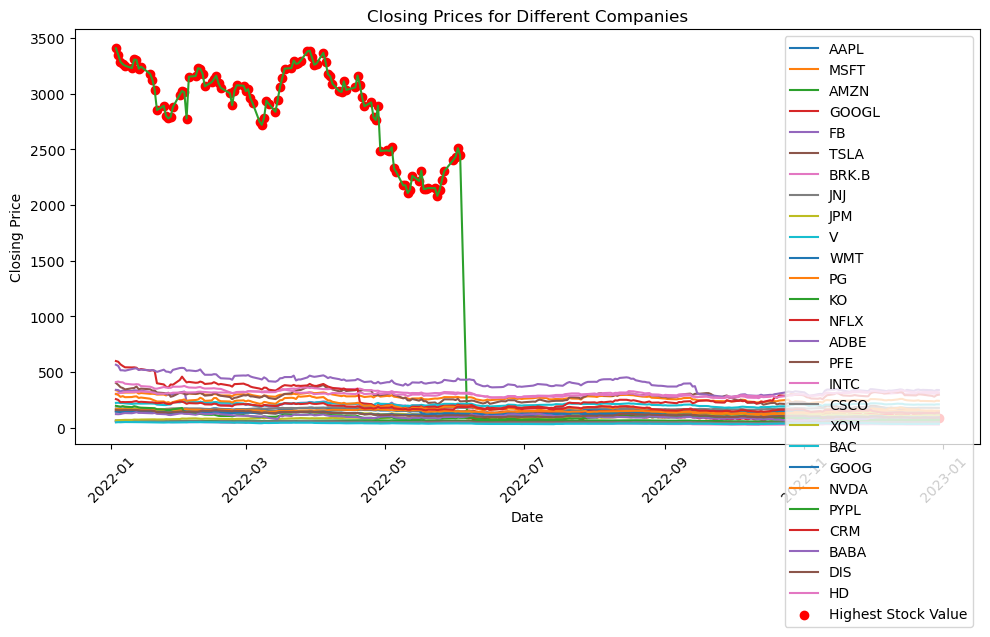

In [27]:
# Find the company with the highest stock value
max_stock_value = stocks_df['close'].max()
company_with_highest_stock = stocks_df.loc[stocks_df['close'] == max_stock_value, 'symbol'].iloc[0]

# Plot closing prices for each company
plt.figure(figsize=(10, 6))
for symbol in stocks_df['symbol'].unique():
    company_data = stocks_df[stocks_df['symbol'] == symbol]
    plt.plot(company_data.index, company_data['close'], label=symbol)

# Highlight the company with the highest stock value
highest_stock_company_data = stocks_df[stocks_df['symbol'] == company_with_highest_stock]
plt.scatter(highest_stock_company_data.index, highest_stock_company_data['close'], color='red', label='Highest Stock Value')

plt.title('Closing Prices for Different Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Sort DataFrame by 'close' column in descending order
sorted_stocks_df = stocks_df.sort_values(by='close', ascending=False)

# Filter out duplicate companies
unique_top_ten_companies = sorted_stocks_df.drop_duplicates(subset='symbol').head(10)

print("Top Ten Companies with Highest Stock Values (No Duplicates):")
print(unique_top_ten_companies[['symbol', 'close']])

Top Ten Companies with Highest Stock Values (No Duplicates):
           symbol        close
priceDate                     
2022-01-03   AMZN  3408.090000
2022-01-03   NFLX   597.370000
2022-01-03   ADBE   564.370000
2022-01-04     HD   412.840000
2022-01-03   TSLA   399.886674
2022-03-28  BRK.B   359.570000
2022-01-03     FB   338.540000
2022-01-03   MSFT   334.750000
2022-01-03   NVDA   301.210000
2022-01-03    CRM   255.460000


## Modelling

#### **Time series Decomposition**

We will do the time series decomposition for only **'AMZN'** and **'NFLX'**. Breaking the non-stationary time series into its three components—trend, seasonality, and residuals—is indeed a helpful approach for investigating the pattern in the past and aiding in the forecasting future stock values.

In [29]:
# Step 1: Extract stock price data for AMZN and NFLX
amzn_data = stocks_df[stocks_df['symbol'] == 'AMZN']['close']
nflx_data = stocks_df[stocks_df['symbol'] == 'NFLX']['close']

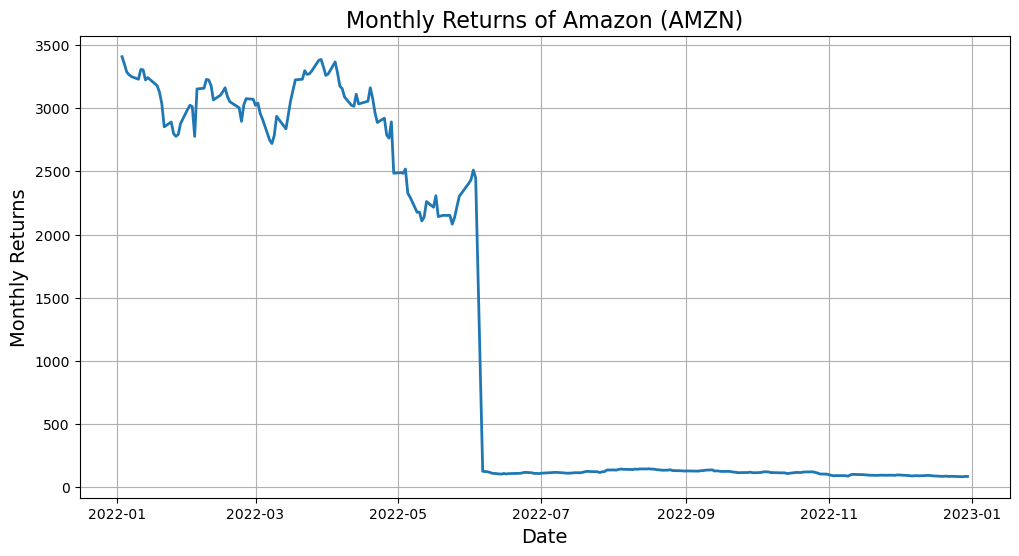

In [30]:
# Plot the raw monthly returns data for AMZN
plt.figure(figsize=(12, 6))
plt.plot(amzn_data, linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Monthly Returns', fontsize=14)
plt.title('Monthly Returns of Amazon (AMZN)', fontsize=16)
plt.grid(True)
plt.show()

### Trend on AMZN

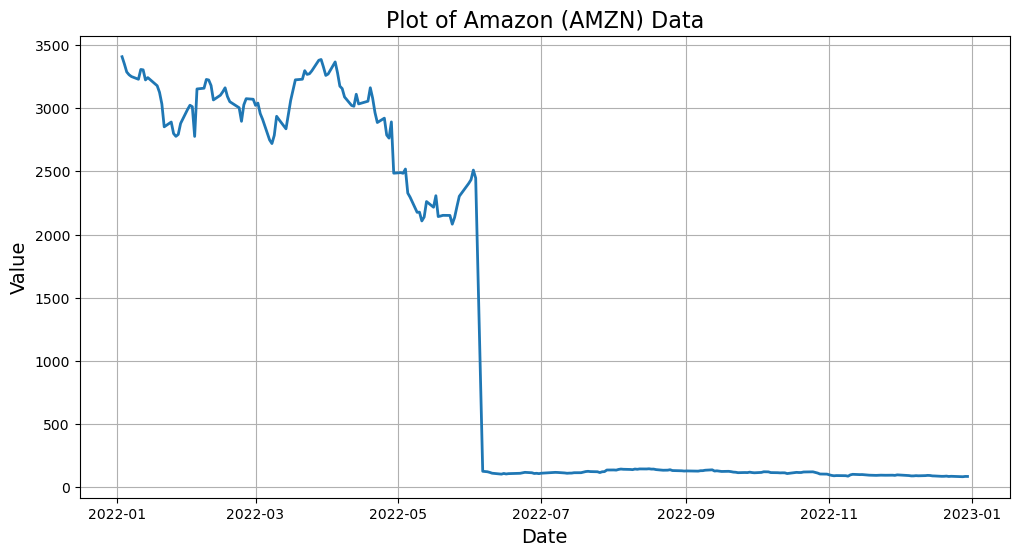

In [31]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(amzn_data.index, amzn_data.values, linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Plot of Amazon (AMZN) Data', fontsize=16)
plt.grid(True)
plt.show()

We perform time series decomposition for **AMZN**

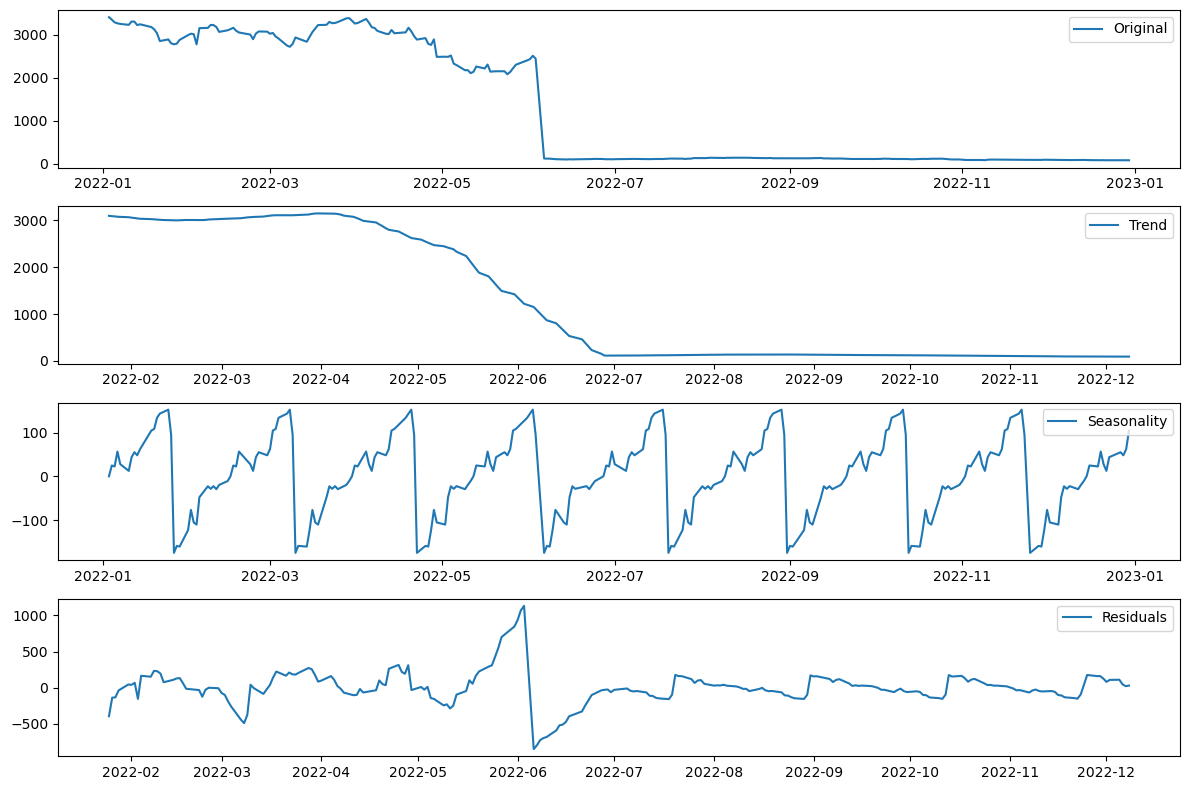

In [32]:
# Perform time series decomposition for AMZN
amzn_decomposition = seasonal_decompose(amzn_data, model='additive', period=30)

# Plot AMZN decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(amzn_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(amzn_decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(amzn_decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(amzn_decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

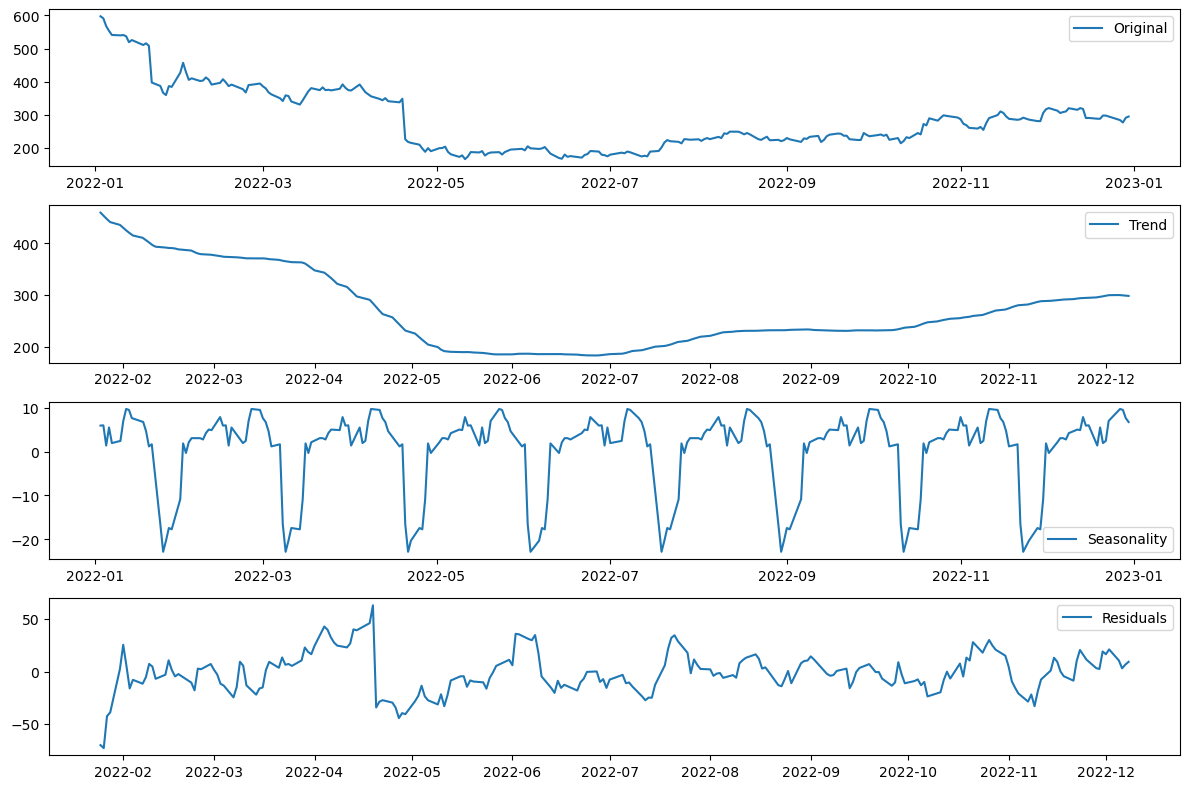

In [33]:
#Perform time series decomposition for NFLX
nflx_decomposition = seasonal_decompose(nflx_data, model='additive', period=30) 

# Plot NFLX decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(nflx_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(nflx_decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(nflx_decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(nflx_decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Stationarity

#### **Rolling Statistics**

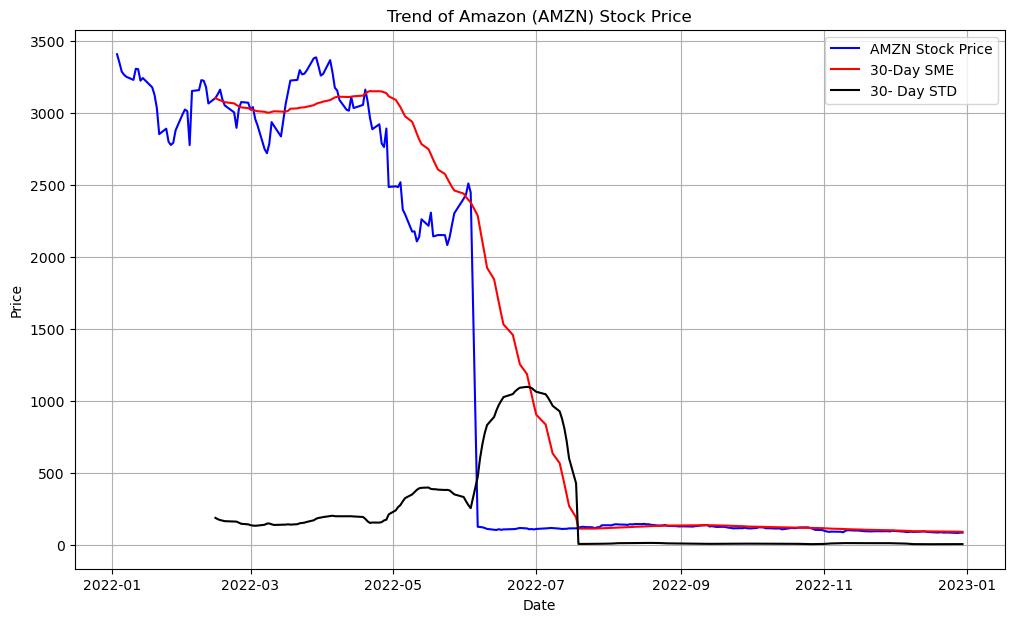

In [34]:
# Calculate simple moving averages (SMA) for 30 days
window = 30
amzn_mean = amzn_data.rolling(window=window).mean()
amzn_std = amzn_data.rolling(window=window).std()

# Plot AMZN stock prices and SMA
fig = plt.figure(figsize=(12,7))
plt.plot(amzn_data, color='blue', label='AMZN Stock Price')
plt.plot(amzn_mean, color='red', label=f'{window}-Day SME')
plt.plot(amzn_std, color = 'black', label = f'{window}- Day STD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Trend of Amazon (AMZN) Stock Price')
plt.grid(True)
plt.show()

The mean is not constant over time, so we can reconfirm our conclusion that the time series is non- stationary based on the rollig mean

#### **Dickey-Fuller**

In [35]:
result = adfuller(amzn_data)
# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.3346312911062364
p-value: 0.6131833499420565
Critical Values:
   1%: -3.456780859712
   5%: -2.8731715065600003
   10%: -2.572968544


**ADF Test Result for Amazon Stock Prices**

For the ADF test results you provided:

1. ADF Statistic: -1.33
2. p-value: 0.6

The p-value is higher than commonly accepted significance levels (like 0.05). We conclude that the Amazon stock prices data is likely non-stationary, meaning its statistical properties may change over time.


### Detrending the AMZN series

It is import to detrend so that it can imporve the accuracy of forecasting models. We are going to detrend using the **Differencing method**.

In [36]:
# Compute the first-order difference
amzn_diff = amzn_data.diff(periods=1)

# Display the first few rows of the differenced data
print(amzn_diff.head(10))

priceDate
2022-01-03      NaN
2022-01-04   -57.65
2022-01-05   -63.30
2022-01-06   -22.06
2022-01-07   -14.00
2022-01-10   -21.36
2022-01-11    77.52
2022-01-12    -3.10
2022-01-13   -79.86
2022-01-14    18.48
Name: close, dtype: float64


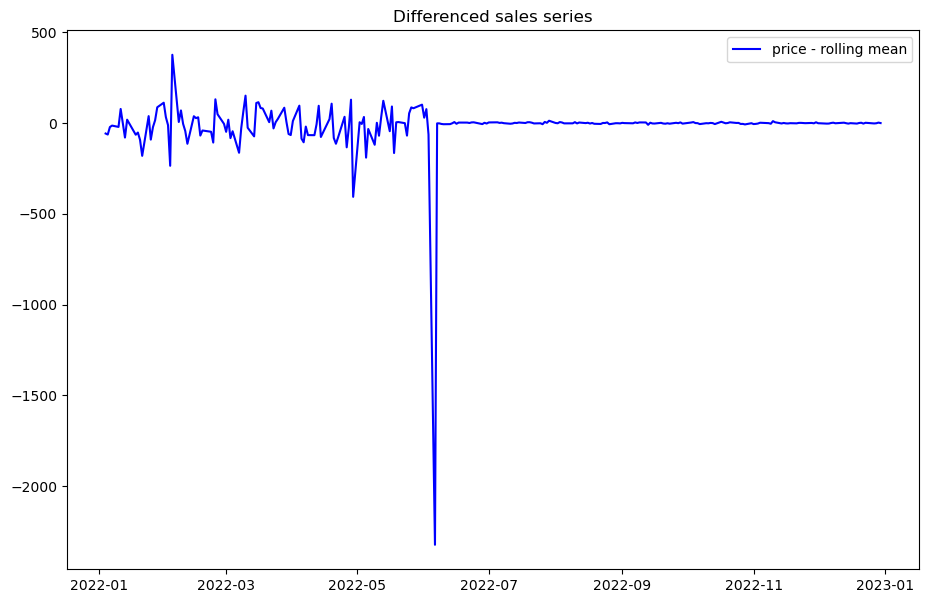

ADF Statistic: -15.592701557403087
p-value: 1.8714446099099064e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


In [37]:
amzn_diff.dropna(inplace=True)

fig = plt.figure(figsize=(11,7))
plt.plot(amzn_diff, color='blue',label='price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

# Print ADF test results
detrend_result_diff = adfuller(amzn_diff)

print('ADF Statistic:', detrend_result_diff[0])
print('p-value:', detrend_result_diff[1])
print('Critical Values:', detrend_result_diff[4])


### Auto-Correlation and Partial Auto-Correlation of the Differenced Data
Plotting the ACF and PACF functions help determine the AR and MA components in the models we intend to build. These functions consider all the above components of a time series like the trend and the seasonality and find their correlations

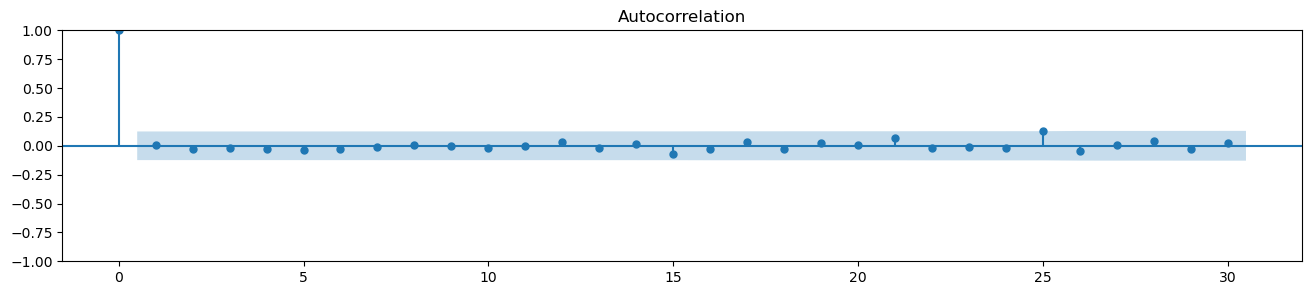

In [38]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
fig, ax = plt.subplots(figsize=(16, 3))
plot_acf(amzn_diff, ax=ax, lags=30)
plt.show();

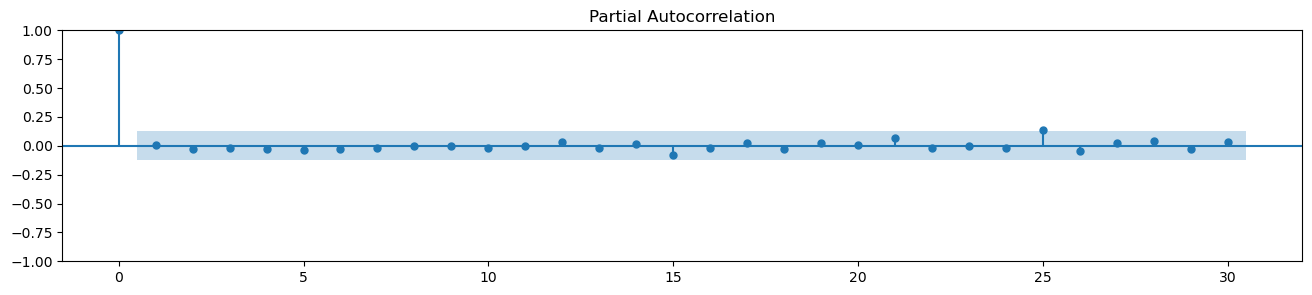

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF
fig, ax = plt.subplots(figsize = (16,3))
plot_pacf(amzn_diff, ax=ax, lags=30, method="ywm");

### ARIMA 

In [112]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm